In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split


In [39]:
df = pd.read_csv(r"stock_market_june2025.csv")

In [40]:
df.head(5)

Date Ticker  Open Price  Close Price  High Price  Low Price  \
0  01-06-2025    SLH       34.92        34.53       35.22      34.38   
1  01-06-2025    WGB      206.50       208.45      210.51     205.12   
2  01-06-2025    ZIN      125.10       124.03      127.40     121.77   
3  01-06-2025    YPY      260.55       265.28      269.99     256.64   
4  01-06-2025    VKD      182.43       186.89      189.40     179.02   

   Volume Traded    Market Cap  PE Ratio  Dividend Yield    EPS  52 Week High  \
0        2966611  5.738136e+10     29.63            2.85   1.17         39.39   
1        1658738  5.274707e+10     13.03            2.73  16.00        227.38   
2       10709898  5.596949e+10     29.19            2.64   4.25        138.35   
3       14012358  7.964089e+10     19.92            1.29  13.32        317.57   
4       14758143  7.271437e+10     40.18            1.17   4.65        243.54   

   52 Week Low       Sector  
0        28.44  Industrials  
1       136.79       Energy  
2       100.69   Healthcare  
3       178.26  Industrials  
4       165.53   Technology

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1762 non-null   object 
 1   Ticker          1762 non-null   object 
 2   Open Price      1762 non-null   float64
 3   Close Price     1762 non-null   float64
 4   High Price      1762 non-null   float64
 5   Low Price       1762 non-null   float64
 6   Volume Traded   1762 non-null   int64  
 7   Market Cap      1762 non-null   float64
 8   PE Ratio        1762 non-null   float64
 9   Dividend Yield  1762 non-null   float64
 10  EPS             1762 non-null   float64
 11  52 Week High    1762 non-null   float64
 12  52 Week Low     1762 non-null   float64
 13  Sector          1762 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 192.8+ KB


In [42]:
df.isnull().sum()

Date              0
Ticker            0
Open Price        0
Close Price       0
High Price        0
Low Price         0
Volume Traded     0
Market Cap        0
PE Ratio          0
Dividend Yield    0
EPS               0
52 Week High      0
52 Week Low       0
Sector            0
dtype: int64

In [43]:
cols_corr = df.drop(columns=['Date','Ticker','Sector'])

In [44]:
cols_corr.corr()

Open Price  Close Price  High Price  Low Price  Volume Traded  \
Open Price        1.000000     0.999302    0.999724   0.999708       0.056119   
Close Price       0.999302     1.000000    0.999709   0.999710       0.057744   
High Price        0.999724     0.999709    1.000000   0.999690       0.056667   
Low Price         0.999708     0.999710    0.999690   1.000000       0.056573   
Volume Traded     0.056119     0.057744    0.056667   0.056573       1.000000   
Market Cap        0.087781     0.087199    0.086821   0.087909       0.370117   
PE Ratio          0.004454     0.003544    0.004426   0.003759      -0.000072   
Dividend Yield    0.028851     0.029331    0.029216   0.028917      -0.002154   
EPS               0.773734     0.774809    0.774098   0.774512       0.073605   
52 Week High      0.987556     0.988206    0.987943   0.987840       0.057281   
52 Week Low       0.971994     0.972473    0.972270   0.972308       0.058942   

                Market Cap  PE Ratio  Dividend Yield       EPS  52 Week High  \
Open Price        0.087781  0.004454        0.028851  0.773734      0.987556   
Close Price       0.087199  0.003544        0.029331  0.774809      0.988206   
High Price        0.086821  0.004426        0.029216  0.774098      0.987943   
Low Price         0.087909  0.003759        0.028917  0.774512      0.987840   
Volume Traded     0.370117 -0.000072       -0.002154  0.073605      0.057281   
Market Cap        1.000000  0.004658       -0.025968  0.057701      0.090919   
PE Ratio          0.004658  1.000000       -0.115248 -0.507784      0.003303   
Dividend Yield   -0.025968 -0.115248        1.000000  0.030597      0.030628   
EPS               0.057701 -0.507784        0.030597  1.000000      0.767427   
52 Week High      0.090919  0.003303        0.030628  0.767427      1.000000   
52 Week Low       0.085419  0.006644        0.029515  0.748380      0.960912   

                52 Week Low  
Open Price         0.971994  
Close Price        0.972473  
High Price         0.972270  
Low Price          0.972308  
Volume Traded      0.058942  
Market Cap         0.085419  
PE Ratio           0.006644  
Dividend Yield     0.029515  
EPS                0.748380  
52 Week High       0.960912  
52 Week Low        1.000000

In [45]:
log_columns = ['Volatility', 'Volume Traded', 'Dividend Yield', '52 Week Low']

# Feature Engineering
df['Volatility'] = df['High Price'] - df['Low Price']
df['Momentum'] = (df['Close Price'] - df['Open Price']) / df['Open Price']

# Log Transformation
for col in log_columns:
    df[f'LN({col})'] = np.log(df[col])


In [46]:
df.head(5)

Date Ticker  Open Price  Close Price  High Price  Low Price  \
0  01-06-2025    SLH       34.92        34.53       35.22      34.38   
1  01-06-2025    WGB      206.50       208.45      210.51     205.12   
2  01-06-2025    ZIN      125.10       124.03      127.40     121.77   
3  01-06-2025    YPY      260.55       265.28      269.99     256.64   
4  01-06-2025    VKD      182.43       186.89      189.40     179.02   

   Volume Traded    Market Cap  PE Ratio  Dividend Yield    EPS  52 Week High  \
0        2966611  5.738136e+10     29.63            2.85   1.17         39.39   
1        1658738  5.274707e+10     13.03            2.73  16.00        227.38   
2       10709898  5.596949e+10     29.19            2.64   4.25        138.35   
3       14012358  7.964089e+10     19.92            1.29  13.32        317.57   
4       14758143  7.271437e+10     40.18            1.17   4.65        243.54   

   52 Week Low       Sector  Volatility  Momentum  LN(Volatility)  \
0        28.44  Industrials        0.84 -0.011168       -0.174353   
1       136.79       Energy        5.39  0.009443        1.684545   
2       100.69   Healthcare        5.63 -0.008553        1.728109   
3       178.26  Industrials       13.35  0.018154        2.591516   
4       165.53   Technology       10.38  0.024448        2.339881   

   LN(Volume Traded)  LN(Dividend Yield)  LN(52 Week Low)  
0          14.902931            1.047319         3.347797  
1          14.321568            1.004302         4.918447  
2          16.186679            0.970779         4.612046  
3          16.455450            0.254642         5.183243  
4          16.507306            0.157004         5.109152

In [47]:
cols_corr1 = df.drop(columns=['Date','Ticker','Sector','High Price','Low Price','52 Week Low','Dividend Yield','Volume Traded','Close Price','Volatility'])

In [48]:
cols_corr1.corr()

Open Price  Market Cap  PE Ratio       EPS  52 Week High  \
Open Price            1.000000    0.087781  0.004454  0.773734      0.987556   
Market Cap            0.087781    1.000000  0.004658  0.057701      0.090919   
PE Ratio              0.004454    0.004658  1.000000 -0.507784      0.003303   
EPS                   0.773734    0.057701 -0.507784  1.000000      0.767427   
52 Week High          0.987556    0.090919  0.003303  0.767427      1.000000   
Momentum              0.018611   -0.001688 -0.020147  0.048757      0.050433   
LN(Volatility)        0.839712    0.043505  0.024524  0.640928      0.832873   
LN(Volume Traded)     0.004398    0.127917  0.006070  0.015222      0.000410   
LN(Dividend Yield)    0.017763   -0.036387 -0.162791  0.049539      0.018285   
LN(52 Week Low)       0.930326    0.063985  0.013848  0.714900      0.921530   

                    Momentum  LN(Volatility)  LN(Volume Traded)  \
Open Price          0.018611        0.839712           0.004398   
Market Cap         -0.001688        0.043505           0.127917   
PE Ratio           -0.020147        0.024524           0.006070   
EPS                 0.048757        0.640928           0.015222   
52 Week High        0.050433        0.832873           0.000410   
Momentum            1.000000        0.005025           0.023066   
LN(Volatility)      0.005025        1.000000           0.015822   
LN(Volume Traded)   0.023066        0.015822           1.000000   
LN(Dividend Yield)  0.012759        0.018188           0.032876   
LN(52 Week Low)     0.031219        0.879015           0.008859   

                    LN(Dividend Yield)  LN(52 Week Low)  
Open Price                    0.017763         0.930326  
Market Cap                   -0.036387         0.063985  
PE Ratio                     -0.162791         0.013848  
EPS                           0.049539         0.714900  
52 Week High                  0.018285         0.921530  
Momentum                      0.012759         0.031219  
LN(Volatility)                0.018188         0.879015  
LN(Volume Traded)             0.032876         0.008859  
LN(Dividend Yield)            1.000000         0.022540  
LN(52 Week Low)               0.022540         1.000000

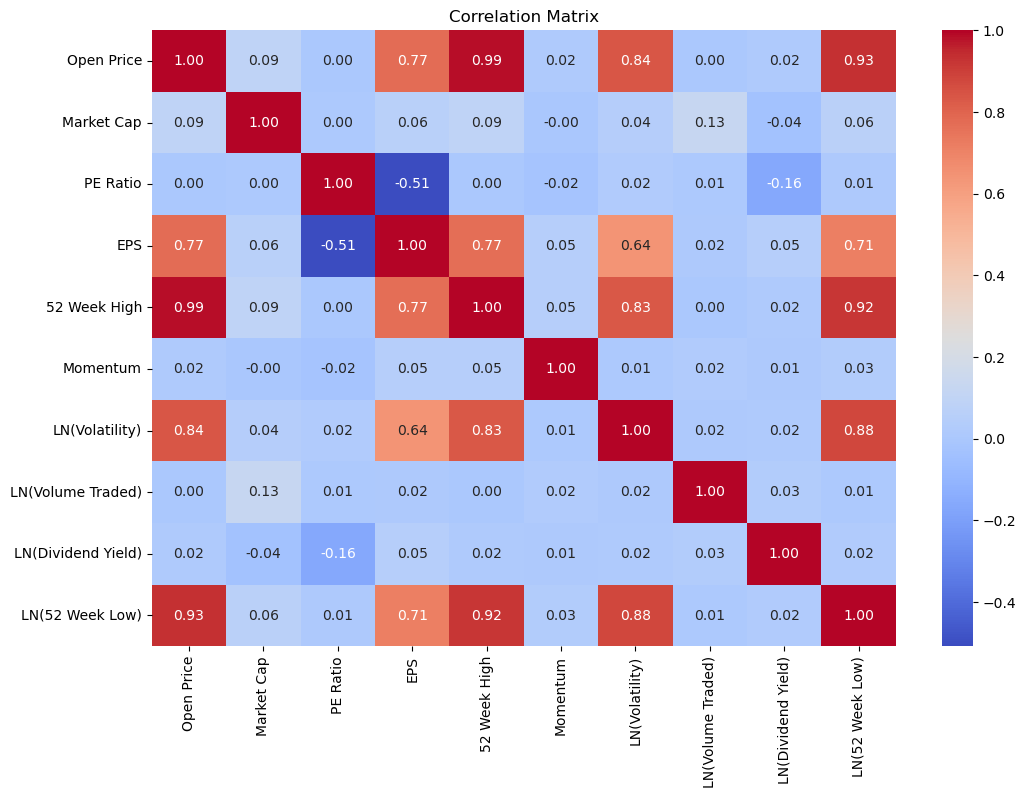

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(cols_corr1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [50]:
Y = cols_corr1[['LN(Volatility)']]
X = cols_corr1.drop(columns=['LN(Volatility)'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Intercept:", model.intercept_[0])
print("Coefficients:")
print(pd.Series(model.coef_[0], index=X.columns))
print("\nR² score on test set:", r2_score(y_test, y_pred))




Intercept: -2.6596711837665588
Coefficients:
Open Price            6.761641e-04
Market Cap           -1.381359e-13
PE Ratio              2.099767e-03
EPS                   2.604353e-03
52 Week High          5.788209e-04
Momentum             -8.711910e-01
LN(Volume Traded)     1.286416e-02
LN(Dividend Yield)    8.421721e-03
LN(52 Week Low)       7.931959e-01
dtype: float64

R² score on test set: 0.7767514626193515


In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model.fit(X_scaled, Y)

LinearRegression()

In [52]:
linear = LinearRegression().fit(X_train, y_train)
print("R² Linear:", linear.score(X_test, y_test))

R² Linear: 0.7767514626193515


In [53]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, Y)

Ridge()

In [54]:
y_pred = ridge.predict(X_scaled)
print("R² score ridge:", r2_score(Y, y_pred))
coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,  # Feature names
    'Ridge Regression': ridge.coef_.flatten()  # Coefficients for Ridge Regression
})
print(coefficients_df)

R² score ridge: 0.7775577118848
              Feature  Ridge Regression
0          Open Price          0.048171
1          Market Cap         -0.015081
2            PE Ratio          0.015661
3                 EPS          0.010161
4        52 Week High          0.077026
5            Momentum         -0.018696
6   LN(Volume Traded)          0.009128
7  LN(Dividend Yield)          0.000669
8     LN(52 Week Low)          0.556794


In [55]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01) # alpha is the regularization strength
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R²:", r2)
print("MSE:", mse)

# 5. Check coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})
print(coef_df)

R²: 0.7748580499619473
MSE: 0.14312045076093757
              Feature   Coefficient
0          Open Price  2.067631e-03
1          Market Cap -1.429666e-13
2            PE Ratio  1.075131e-03
3                 EPS  0.000000e+00
4        52 Week High  5.047615e-04
5            Momentum -0.000000e+00
6   LN(Volume Traded)  0.000000e+00
7  LN(Dividend Yield)  0.000000e+00
8     LN(52 Week Low)  6.475572e-01


In [56]:
import warnings
warnings.filterwarnings('ignore')


In [57]:
from sklearn.linear_model import RidgeCV

# Define a list of alphas to test
alphas = [0.01, 0.1, 1, 10, 100]

# RidgeCV will select the best alpha using cross-validation
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

# Best alpha and final R²
print("Best alpha:", ridge_cv.alpha_)
print("R² on test set:", ridge_cv.score(X_test, y_test))


Best alpha: 1.0
R² on test set: 0.7760136021930628


In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge = Ridge()
grid = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

# Best model info
print("Best alpha:", grid.best_params_['alpha'])
print("Best cross-validated R²:", grid.best_score_)


Best alpha: 1
Best cross-validated R²: 0.7733888380628311


In [59]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': np.ravel(grid.best_estimator_.coef_)  # flatten if needed
})

# Sort by absolute value of coefficient, descending
coef_df['|Coefficient|'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='|Coefficient|', ascending=False)

# Display
print(coef_df)

              Feature   Coefficient  |Coefficient|
8     LN(52 Week Low)  7.838428e-01   7.838428e-01
5            Momentum -2.481016e-01   2.481016e-01
6   LN(Volume Traded)  1.239707e-02   1.239707e-02
7  LN(Dividend Yield)  8.294424e-03   8.294424e-03
3                 EPS  2.229507e-03   2.229507e-03
2            PE Ratio  2.019844e-03   2.019844e-03
0          Open Price  9.240508e-04   9.240508e-04
4        52 Week High  4.480256e-04   4.480256e-04
1          Market Cap -1.403066e-13   1.403066e-13


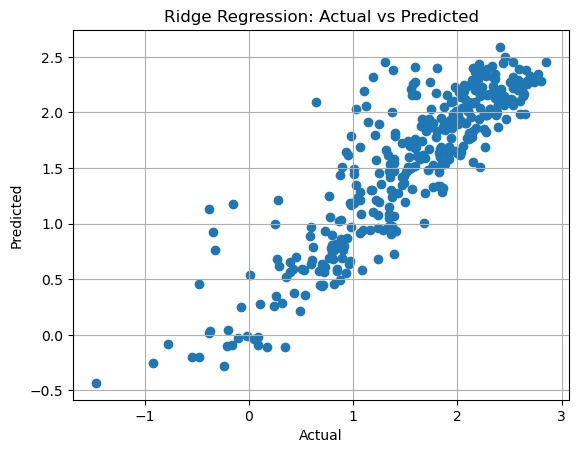

In [60]:
import matplotlib.pyplot as plt

y_pred = grid.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

In [61]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# 2. Optional: get the new feature names
poly_feature_names = poly.get_feature_names_out(X.columns)

# 3. Train-test split
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

# 4. Ridge Regression with GridSearchCV to find best alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
ridge = Ridge()
grid = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid.fit(X_train_poly, y_train)

# 5. Predictions
y_pred = grid.predict(X_test_poly)

# 6. Evaluation
print("Best alpha:", grid.best_params_['alpha'])
print("Best cross-validated R²:", grid.best_score_)
print("Test R²:", r2_score(y_test, y_pred))
print("Test MSE:", mean_squared_error(y_test, y_pred))

# 7. Coefficient table (optional)
coef_df = pd.DataFrame({
    'Feature': poly_feature_names,
    'Coefficient': np.ravel(grid.best_estimator_.coef_)
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

Best alpha: 10
Best cross-validated R²: 0.7801844359012123
Test R²: 0.7539824895398167
Test MSE: 0.15639083247788346
                                 Feature   Coefficient
40                 52 Week High Momentum  1.443054e-01
14                   Open Price Momentum -1.222567e-01
0                             Open Price  7.340228e-02
27                          PE Ratio EPS -5.066543e-02
52    LN(Dividend Yield) LN(52 Week Low)  4.741451e-02
50     LN(Volume Traded) LN(52 Week Low)  4.202498e-02
2                               PE Ratio -4.010287e-02
35                          EPS Momentum  3.695194e-02
8                        LN(52 Week Low)  3.404652e-02
45            Momentum LN(Volume Traded) -2.436839e-02
7                     LN(Dividend Yield) -2.379617e-02
3                                    EPS -1.262683e-02
47              Momentum LN(52 Week Low) -1.116539e-02
46           Momentum LN(Dividend Yield) -1.014354e-02
6                      LN(Volume Traded) -9.648849e-03
38 